In [1]:
from collections import defaultdict, Counter
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
data = \
[[['градищева', 'жорж', 'саша'],
  ['градищева', 'жорж', 'саша', 'градищев'],
  ['градищева', 'жорж', 'саша', 'градищев', 'слуга'],
  ['сережа', 'градищева', 'слуга'],
  ['сережа', 'градищева', 'елена', 'уайт', 'слуга'],
  ['сережа', 'градищева', 'елена', 'уайт', 'осипов'],
  ['градищева', 'осипов', 'елена', 'сережа', 'уайт'],
  ['градищева', 'осипов', 'елена', 'сережа', 'уайт'],
  ['градищева', 'осипов', 'елена', 'сережа', 'уайт', 'жорж'],
  ['жорж', 'саша'],
  ['жорж', 'градищева', 'елена'],
  ['жорж', 'градищева', 'елена', 'градищев', 'слуга']],
 [['хлопонина', 'сережа'],
  ['хлопонина', 'сережа', 'петр'],
  ['сережа', 'петр'],
  ['сережа', 'хлопонин', 'петр'],
  ['сережа', 'петр'],
  ['сережа', 'петр', 'градищев'],
  ['сережа', 'хлопонин'],
  ['сережа', 'хлопонин', 'градищев'],
  ['хлопонин', 'градищев'],
  ['хлопонин', 'хлопонина', 'сережа']],
 [['градищева', 'елена', 'жорж'],
  ['градищева', 'жорж'],
  ['градищева', 'саша', 'жорж'],
  ['градищева', 'василий', 'либенталь'],
  ['градищева', 'елена', 'уайт', 'градищев', 'василий'],
  ['осипов', 'елена'],
  ['елена', 'саша'],
  ['елена', 'градищев', 'градищева'],
  ['градищев', 'градищева', 'елена', 'уайт', 'жорж'],
  ['градищев', 'градищева', 'елена', 'уайт', 'жорж', 'слуга', 'сережа', 'хлопонин']],
 [['градищев', 'хлопонин'],
  ['градищев', 'хлопонин', 'елена', 'сережа'],
  ['елена', 'хлопонина'],
  ['елена', 'хлопонина', 'шафер', 'жорж'],
  ['елена', 'хлопонина', 'шафер', 'жорж', 'сережа', 'официант'],
  ['елена', 'сережа', 'жорж', 'шафер'],
  ['осипов', 'градищева', 'елена'],
  ['осипов', 'сережа', 'градищев', 'градищева', 'жорж', 'хлопонин']]]


## Матрица

In [3]:
drama_heroes = [hero for act in data for scene in act for hero in scene]
drama_heroes = list(sorted(set(drama_heroes)))
matrices = [np.array([[1 if hero in scene else 0 for scene in act] for hero in drama_heroes]) for act in data]

In [4]:
def rome(dec):
    return {1: 'I', 2: 'II', 3: 'III', 4: 'IV', 5: 'V', 6: 'VI'}[dec]

def col(act, scene):
    return rome(act) + '.' + str(scene)

def cols():
    return [col(n_act+1, n_scene+1) for n_act, act in enumerate(matrices) for n_scene in range(len(act[0]))]

matrix = np.hstack(matrices)
pd.DataFrame(matrix, index=drama_heroes, columns=cols())

,I.1,I.2,I.3,I.4,I.5,I.6,I.7,I.8,I.9,I.10,I.11,I.12,II.1,II.2,II.3,II.4,II.5,II.6,II.7,II.8,II.9,II.10,III.1,III.2,III.3,III.4,III.5,III.6,III.7,III.8,III.9,III.10,IV.1,IV.2,IV.3,IV.4,IV.5,IV.6,IV.7,IV.8
василий,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
градищев,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,1,1,1,1,1,0,0,0,0,0,1
градищева,1,1,1,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,1,1,1,0,0,0,0,0,0,1,1
елена,0,0,0,0,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,1,1,1,0,1,1,1,1,1,1,0
жорж,1,1,1,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,0,0,0,1,1,1,0,1
либенталь,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
осипов,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1
официант,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
петр,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
саша,1,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


## Мобильность

In [5]:
def mob(mat):
    return (np.sum(np.abs(mat[:, 1:] - mat[:, :-1]), axis=1) - 1) / (len(mat[0])-1)

index = list(range(1, len(matrices) + 1)) + ['пьеса']
mobility = list(map(mob, matrices + [matrix]))
mobility = pd.DataFrame(mobility, index=index, columns=drama_heroes).round(2).transpose()
mobility[mobility < 0] = ''
mobility

,1,2,3,4,пьеса
василий,,,0.11,,0.03
градищев,0.18,0.33,0.22,0.14,0.31
градищева,0.09,,0.11,0,0.18
елена,0.18,,0.11,0.14,0.23
жорж,0.09,,0.11,0.29,0.23
либенталь,,,0.11,,0.03
осипов,0.09,,0.11,0,0.10
официант,,,,0.14,0.03
петр,,0.11,,,0.03
саша,0.18,,0.33,,0.15


## Плотность

In [6]:
def dens(matrix):
#     print(np.count_nonzero(matrix), '/', matrix.size, sep='', end=', ')
    return np.count_nonzero(matrix)/matrix.size

In [7]:
print('Плотность всей пьесы:', round(dens(matrix), 2))

act_d = list(map(dens, matrices))
act_d_ = np.array(act_d).reshape(-1, 1)
scene_d = [[dens(c) for c in m.T] for m in matrices]
scene_d_ = pd.DataFrame(scene_d).values # to fill with nans
columns = list(range(1, len(scene_d_[0]) + 1)) + ['действия']
index = list(range(1, len(data)+1))
density = pd.DataFrame(np.hstack((scene_d_, act_d_)), columns=columns, index=index)
density.round(2).fillna('')

Плотность всей пьесы: 0.22


,1,2,3,4,5,6,7,8,9,10,11,12,действия
1,0.19,0.25,0.31,0.19,0.31,0.31,0.31,0.31,0.38,0.12,0.19,0.31,0.27
2,0.12,0.19,0.12,0.19,0.12,0.19,0.12,0.19,0.12,0.19,,,0.16
3,0.19,0.12,0.19,0.19,0.31,0.12,0.12,0.19,0.31,0.5,,,0.22
4,0.12,0.25,0.12,0.25,0.38,0.25,0.19,0.38,,,,,0.24


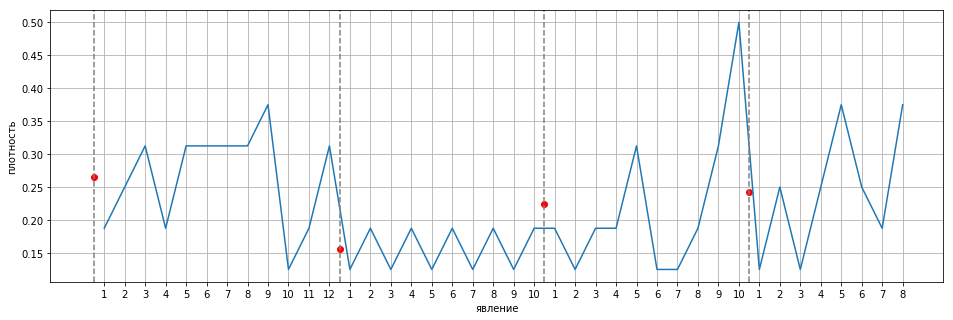

In [8]:
from itertools import accumulate

plt.subplots(figsize=(16, 5));

flat = [tup for act in scene_d for tup in enumerate(act, start=1)]
ticks, values = zip(*flat)
plt.plot(values);
plt.xticks(range(len(ticks)), ticks);

borders = np.array(list(accumulate(map(len, [[]] + scene_d))))
plt.scatter(borders[:-1]-0.5, act_d, c='red');
for x in borders[:-1]:
    plt.axvline(x-0.5, c='gray', ls='--');
    
plt.xlabel('явление');
plt.ylabel('плотность');
plt.grid();

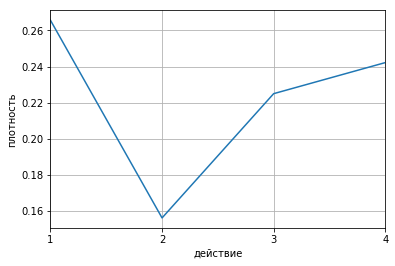

In [9]:
plt.plot(act_d)
plt.grid();
plt.xlabel('действие');
plt.ylabel('плотность');
plt.xticks(range(len(act_d)+1), range(1, len(act_d)+1));
plt.xlim([0, len(act_d)-1]);

## Расстояние

In [10]:
def dist(mat):
    n = len(drama_heroes)
    dist = np.zeros((n, n))*np.nan
    for i in range(n-1):
        for j in range(i+1, n):
            if np.sum(mat[i]) != 0 and np.sum(mat[j]) != 0:
                dist[i][j] = dist[j][i] = np.sum(np.abs(mat[i] - mat[j]))
    return dist/len(mat[0])

In [11]:
act_d = [dist(m) for m in matrices]
drama_d = dist(matrix)

In [12]:
distances = [pd.DataFrame(d, index=drama_heroes, columns=drama_heroes).stack() for d in act_d + [drama_d]]
distances = pd.concat(distances, axis=1)
distances.columns = list(range(1, len(act_d) + 1)) + ['пьеса']
distances.round(2).fillna('')

1    2    3     4  пьеса
василий   градищев              0.4         0.32
          градищева             0.6         0.48
          елена                 0.7         0.50
          жорж                  0.7         0.45
          либенталь             0.1         0.02
          осипов                0.3         0.22
          официант                          0.08
          петр                              0.18
          саша                  0.4         0.20
          сережа                0.3         0.55
          слуга                 0.3         0.18
          уайт                  0.3         0.20
          хлопонин              0.3         0.28
          хлопонина                         0.20
          шафер                             0.12
градищев  василий               0.4         0.32
          градищева  0.67       0.4  0.38   0.45
          елена      0.67       0.3  0.88   0.52
          жорж       0.33       0.5  0.62   0.42
          либенталь             0.5         0.35
          осипов     0.58       0.5  0.38   0.45
          официант                    0.5   0.35
          петр             0.6              0.40
          саша       0.25       0.6         0.38
          сережа     0.75  0.8  0.3  0.38   0.57
          слуга      0.25       0.3         0.30
          уайт       0.67       0.1         0.38
          хлопонин         0.4  0.3     0   0.25
          хлопонина        0.6       0.75   0.48
          шафер                      0.75   0.40
градищева василий               0.6         0.48
          градищев   0.67       0.4  0.38   0.45
          елена      0.33       0.5  0.75   0.38
          жорж        0.5       0.3   0.5   0.32
          либенталь             0.7         0.50
          осипов     0.58       0.9     0   0.40
          официант                   0.38   0.55
          петр                              0.65
          саша       0.75       0.8         0.48
          сережа     0.42       0.7   0.5   0.62
          слуга      0.58       0.7         0.40
          уайт        0.5       0.5         0.32
          хлопонин              0.7  0.38   0.65
          хлопонина                  0.62   0.68
          шафер                      0.62   0.60
елена     василий               0.7         0.50
          градищев   0.67       0.3  0.88   0.52
          градищева  0.33       0.5  0.75   0.38
          жорж       0.67       0.6   0.5   0.45
          либенталь             0.8         0.52
          осипов     0.25       0.6  0.75   0.38
          официант                   0.62   0.48
          петр                              0.62
          саша       0.92       0.7         0.60
          сережа     0.25       0.6   0.5   0.55
          слуга      0.58       0.6         0.48
          уайт       0.17       0.4         0.30
          хлопонин              0.6  0.88   0.62
          хлопонина                  0.38   0.50
          шафер                      0.38   0.42
жорж      василий               0.7         0.45
          градищев   0.33       0.5  0.62   0.42
          градищева   0.5       0.3   0.5   0.32
          елена      0.67       0.6   0.5   0.45
          либенталь             0.6         0.42
          осипов     0.75       0.6   0.5   0.48
          официант                   0.38   0.38
          петр                              0.52
          саша       0.25       0.5         0.30
          сережа     0.92       0.4  0.25   0.65
          слуга      0.58       0.4         0.38
          уайт       0.83       0.4         0.45
          хлопонин              0.4  0.62   0.52
          хлопонина                  0.38   0.45
          шафер                      0.12   0.32
либенталь василий               0.1         0.02
          градищев              0.5         0.35
          градищева             0.7         0.50
          елена                 0.8         0.52
          жорж                  0.6         0.42
          осипов                0.2         0.20
      

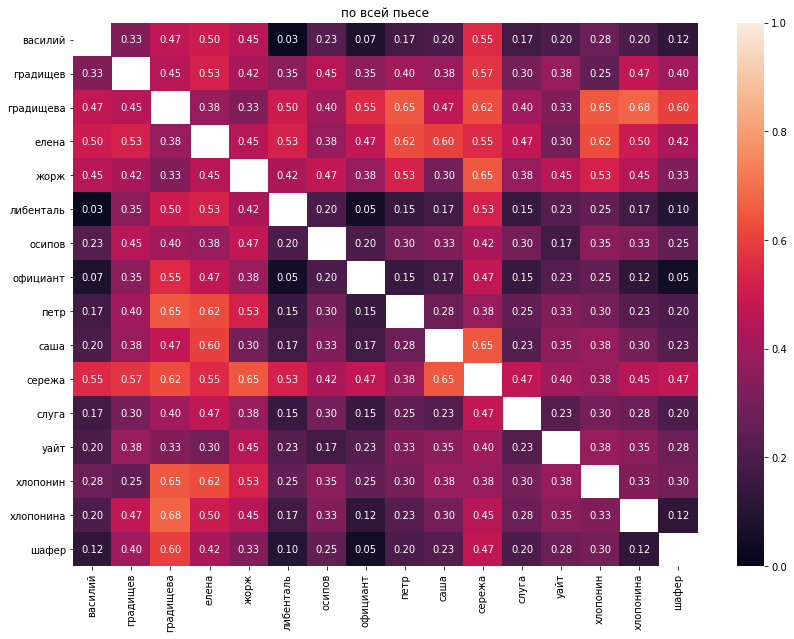

In [13]:
plt.subplots(figsize=(14, 10))
sns.heatmap(drama_d, vmin=0, vmax=1, annot=True, xticklabels=drama_heroes, yticklabels=drama_heroes, fmt='.2f')
plt.title('по всей пьесе');

## Абстрактные типы отношений (= соп., <> альт., > или < дом.)

In [14]:
for i, j in zip(*np.where(drama_d == 0)):
    if i != j and i < j:
        p = np.sum(matrix[i])
        q = np.sum(matrix[j])
        s = '=' if p == q else ('>' if p > q else '<')
        print(drama_heroes[i], s, drama_heroes[j])

## Ранг

In [15]:
rank = [np.sum(np.sum(matrix, axis=0)[np.where(matrix[i] != 0)[0]] - 1) for i in range(len(drama_heroes))]
df = pd.DataFrame(dict(zip(drama_heroes, rank)), index=['ранг']).sort_values(by='ранг', axis=1, ascending=False)

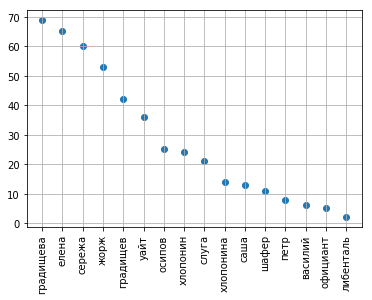

In [16]:
plt.scatter(range(len(drama_heroes)), df.values);
plt.xticks(range(len(drama_heroes)), df.columns, rotation=90);
plt.grid();

In [17]:
df

,градищева,елена,сережа,жорж,градищев,уайт,осипов,хлопонин,слуга,хлопонина,саша,шафер,петр,василий,официант,либенталь
ранг,69,65,60,53,42,36,25,24,21,14,13,11,8,6,5,2


## Абсолютные относительные частоты

In [18]:
def freq(mat):
    return np.sum(mat, axis=1)/len(mat[0])

index = list(range(1, len(matrices) + 1)) + ['пьеса']
freq_abs = list(map(freq, matrices + [matrix]))
freq_abs = pd.DataFrame(freq_abs, index=index, columns=drama_heroes).round(2).transpose()
freq_abs[freq_abs == 0] = ''
freq_abs.sort_values(by='пьеса', ascending=False)

,1,2,3,4,пьеса
градищева,0.92,,0.8,0.25,0.52
елена,0.58,,0.7,0.75,0.50
сережа,0.5,0.9,0.1,0.5,0.50
жорж,0.58,,0.5,0.5,0.40
градищев,0.25,0.3,0.4,0.38,0.32
хлопонин,,0.5,0.1,0.38,0.22
уайт,0.42,,0.3,,0.20
осипов,0.33,,0.1,0.25,0.18
саша,0.33,,0.2,,0.15
хлопонина,,0.3,,0.38,0.15


## Условные относительные частоты

In [19]:
def rel_freq(mat):
    busyness = np.sum(mat, axis=1)
    freq_rel = np.zeros((len(drama_heroes), len(drama_heroes)))
    for i in range(len(mat)):
        for j in range(len(mat)):
            if busyness[j] == 0 or i == j:
                freq_rel[i, j] = np.nan
            else:
                freq_rel[i, j] = np.count_nonzero(mat[i] + mat[j] - 2 == 0)/busyness[j]
    return freq_rel

for i, m in enumerate(matrices):
    print('Действие', i+1)
    pd.DataFrame(rel_freq(m), index=drama_heroes, columns=drama_heroes).round(2).fillna('')
    
print('По всей пьесе')
pd.DataFrame(rel_freq(matrix), index=drama_heroes, columns=drama_heroes).round(2).fillna('')

Действие 1


,василий,градищев,градищева,елена,жорж,либенталь,осипов,официант,петр,саша,сережа,слуга,уайт,хлопонин,хлопонина,шафер
василий,,0,0,0,0,,0,,,0,0,0,0,,,
градищев,,,0.27,0.14,0.43,,0,,,0.5,0,0.5,0,,,
градищева,,1,,1,0.86,,1,,,0.75,1,1,1,,,
елена,,0.33,0.64,,0.43,,1,,,0,0.83,0.5,1,,,
жорж,,1,0.55,0.43,,,0.25,,,1,0.17,0.5,0.2,,,
либенталь,,0,0,0,0,,0,,,0,0,0,0,,,
осипов,,0,0.36,0.57,0.14,,,,,0,0.67,0,0.8,,,
официант,,0,0,0,0,,0,,,0,0,0,0,,,
петр,,0,0,0,0,,0,,,0,0,0,0,,,
саша,,0.67,0.27,0,0.57,,0,,,,0,0.25,0,,,


Действие 2


,василий,градищев,градищева,елена,жорж,либенталь,осипов,официант,петр,саша,сережа,слуга,уайт,хлопонин,хлопонина,шафер
василий,,0,,,,,,,0,,0,,,0,0,
градищев,,,,,,,,,0.2,,0.22,,,0.4,0,
градищева,,0,,,,,,,0,,0,,,0,0,
елена,,0,,,,,,,0,,0,,,0,0,
жорж,,0,,,,,,,0,,0,,,0,0,
либенталь,,0,,,,,,,0,,0,,,0,0,
осипов,,0,,,,,,,0,,0,,,0,0,
официант,,0,,,,,,,0,,0,,,0,0,
петр,,0.33,,,,,,,,,0.56,,,0.2,0.33,
саша,,0,,,,,,,0,,0,,,0,0,


Действие 3


,василий,градищев,градищева,елена,жорж,либенталь,осипов,официант,петр,саша,сережа,слуга,уайт,хлопонин,хлопонина,шафер
василий,,0.25,0.25,0.14,0,1,0,,,0,0,0,0.33,0,,
градищев,0.5,,0.5,0.57,0.4,0,0,,,0,1,1,1,1,,
градищева,1,1,,0.71,1,1,0,,,0.5,1,1,1,1,,
елена,0.5,1,0.62,,0.6,0,1,,,0.5,1,1,1,1,,
жорж,0,0.5,0.62,0.43,,0,0,,,0.5,1,1,0.67,1,,
либенталь,0.5,0,0.12,0,0,,0,,,0,0,0,0,0,,
осипов,0,0,0,0.14,0,0,,,,0,0,0,0,0,,
официант,0,0,0,0,0,0,0,,,0,0,0,0,0,,
петр,0,0,0,0,0,0,0,,,0,0,0,0,0,,
саша,0,0,0.12,0.14,0.2,0,0,,,,0,0,0,0,,


Действие 4


,василий,градищев,градищева,елена,жорж,либенталь,осипов,официант,петр,саша,сережа,слуга,уайт,хлопонин,хлопонина,шафер
василий,,0,0,0,0,,0,0,,,0,,,0,0,0
градищев,,,0.5,0.17,0.25,,0.5,0,,,0.5,,,1,0,0
градищева,,0.33,,0.17,0.25,,1,0,,,0.25,,,0.33,0,0
елена,,0.33,0.5,,0.75,,0.5,1,,,0.75,,,0.33,1,1
жорж,,0.33,0.5,0.5,,,0.5,1,,,0.75,,,0.33,0.67,1
либенталь,,0,0,0,0,,0,0,,,0,,,0,0,0
осипов,,0.33,1,0.17,0.25,,,0,,,0.25,,,0.33,0,0
официант,,0,0,0.17,0.25,,0,,,,0.25,,,0,0.33,0.33
петр,,0,0,0,0,,0,0,,,0,,,0,0,0
саша,,0,0,0,0,,0,0,,,0,,,0,0,0


По всей пьесе


,василий,градищев,градищева,елена,жорж,либенталь,осипов,официант,петр,саша,сережа,слуга,уайт,хлопонин,хлопонина,шафер
василий,,0.08,0.1,0.05,0,1,0,0,0,0,0,0,0.12,0,0,0
градищев,0.5,,0.38,0.3,0.38,0,0.14,0,0.2,0.33,0.25,0.6,0.38,0.67,0,0
градищева,1,0.62,,0.65,0.75,1,0.86,0,0,0.67,0.4,1,1,0.22,0,0
елена,0.5,0.46,0.62,,0.56,0,0.86,1,0,0.17,0.45,0.6,1,0.22,0.5,1
жорж,0,0.46,0.57,0.45,,0,0.29,1,0,0.83,0.25,0.6,0.38,0.22,0.33,1
либенталь,0.5,0,0.05,0,0,,0,0,0,0,0,0,0,0,0,0
осипов,0,0.08,0.29,0.3,0.12,0,,0,0,0,0.25,0,0.5,0.11,0,0
официант,0,0,0,0.05,0.06,0,0,,0,0,0.05,0,0,0,0.17,0.33
петр,0,0.08,0,0,0,0,0,0,,0,0.25,0,0,0.11,0.17,0
саша,0,0.15,0.19,0.05,0.31,0,0,0,0,,0,0.2,0,0,0,0


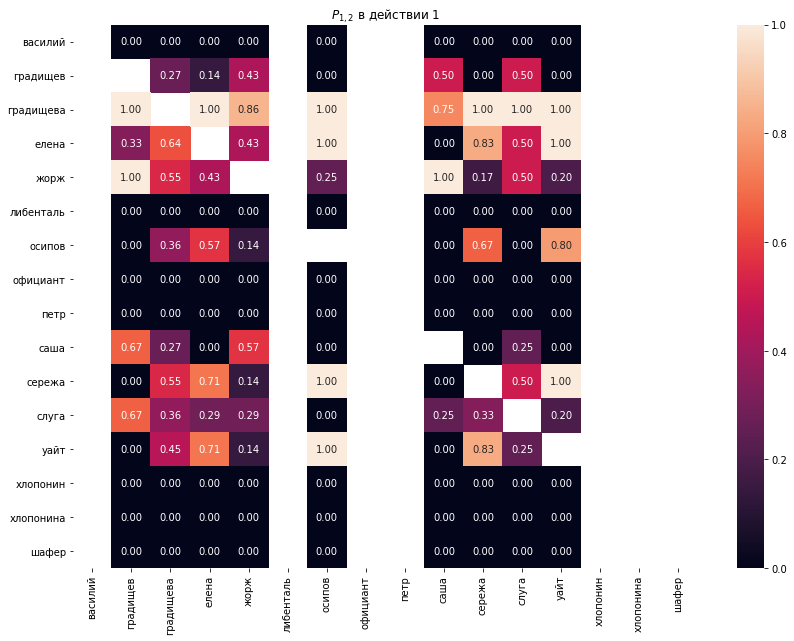

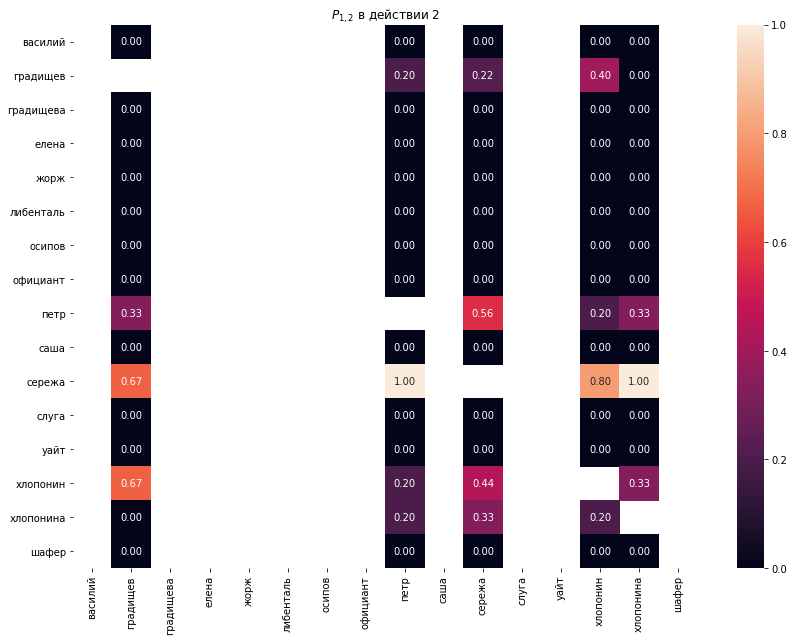

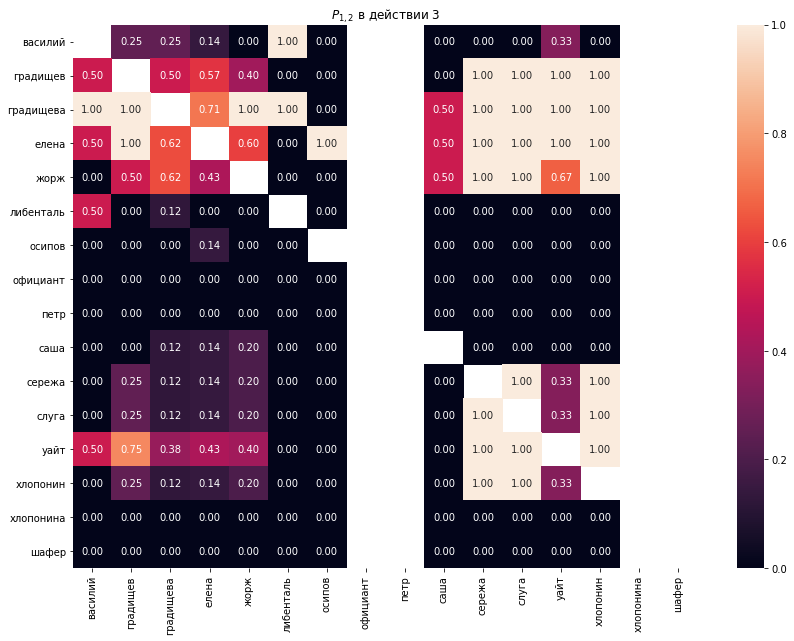

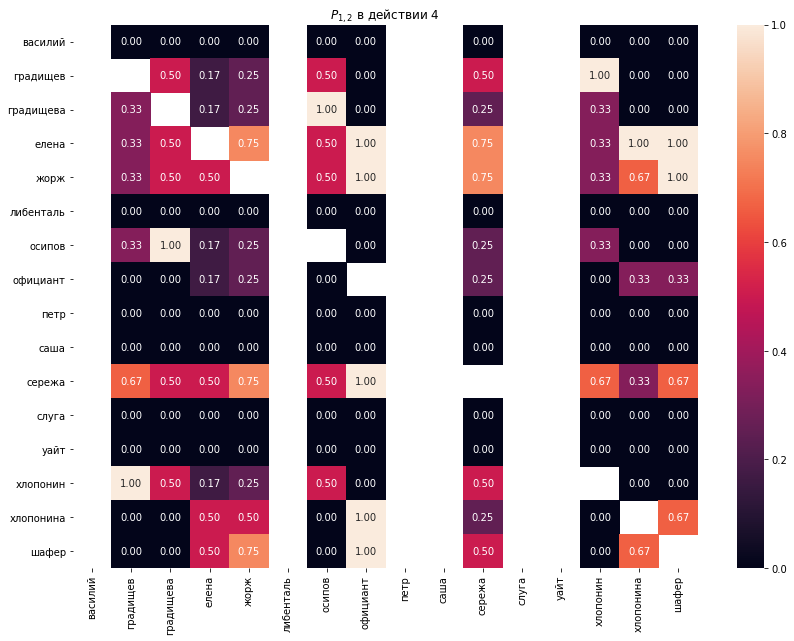

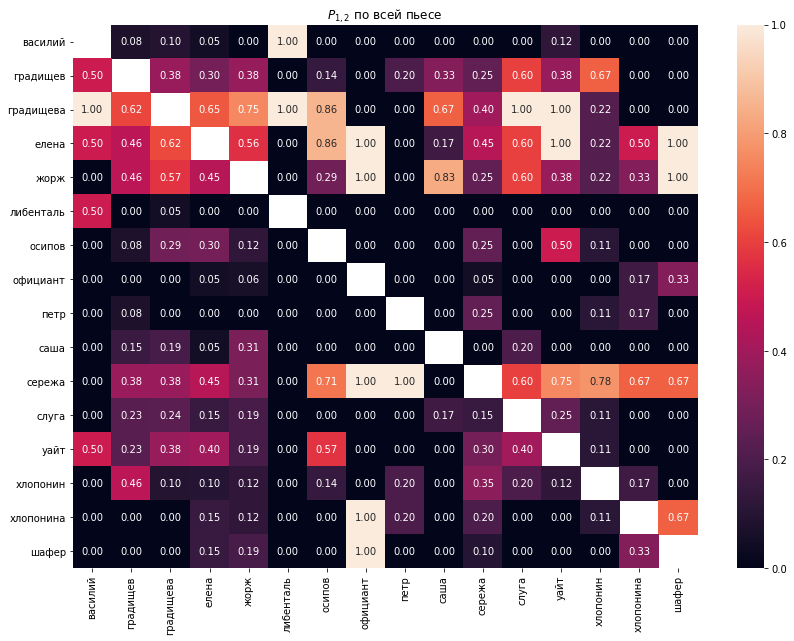

In [20]:
for i, m in enumerate(matrices):
    plt.subplots(figsize=(14, 10))
    sns.heatmap(rel_freq(m), vmin=0, vmax=1, annot=True, xticklabels=drama_heroes, yticklabels=drama_heroes, fmt='.2f')
    plt.title(r"$P_{1,2}$ в действии " + str(i+1));

plt.subplots(figsize=(14, 10))
sns.heatmap(rel_freq(matrix), vmin=0, vmax=1, annot=True, xticklabels=drama_heroes, yticklabels=drama_heroes, fmt='.2f')
plt.title(r"$P_{1,2}$ по всей пьесе");

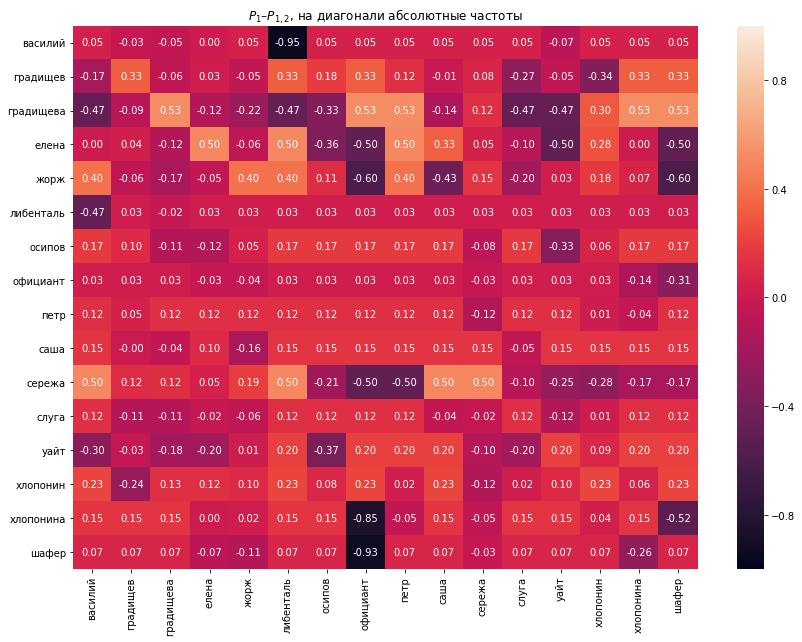

In [21]:
freq_abs = freq(matrix).reshape((-1, 1))
freq_rel = rel_freq(matrix)
freq_ = freq_abs - freq_rel
freq_[np.diag_indices(len(freq_[0]))] = freq_abs.ravel()
plt.subplots(figsize=(14, 10))
sns.heatmap(freq_, annot=True, xticklabels=drama_heroes, yticklabels=drama_heroes, fmt='.2f', vmin=-1, vmax=1)
plt.title(r"$P_1 – P_{1,2}$, на диагонали абсолютные частоты");